In [1]:
# Importing the essential modules from external libraies.
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Reading data from csv file
trainset = pd.read_csv('Training.csv')
testset = pd.read_csv('Testing.csv')

In [3]:
testset.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
37,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
39,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
41,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Fungal infection


In [4]:
# Splitting colmuns into features (input) and output in train data set
x_train = trainset.iloc[:,:132]
y_train = trainset.iloc[:,132]

In [5]:
# Splitting colmuns into features (input) and output in test data set
x_test = testset.iloc[:,:132]
y_test = testset.iloc[:,132]

In [19]:
# from sklearn.model_selection import train_test_split

In [26]:
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [6]:
# Creating a object with randomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)

In [7]:
# Training the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
# Predicting the output for test data set
y_pred = rf.predict(x_test)

In [16]:
# Checking accuary of the model
from sklearn import metrics 
accuracy_score = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("RandamForest Precision:", precision)
print("RandamForest Recall:", recall)
print("RandamForest F1 Score:", f1)
print("RandamForest Accuracy : ", accuracy_score)

RandamForest Precision: 0.9880952380952381
RandamForest Recall: 0.9761904761904762
RandamForest F1 Score: 0.9761904761904762
RandamForest Accuracy :  0.9761904761904762


In [12]:
m = metrics.confusion_matrix(y_test,y_pred)
m

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for RandamForestClassifer')

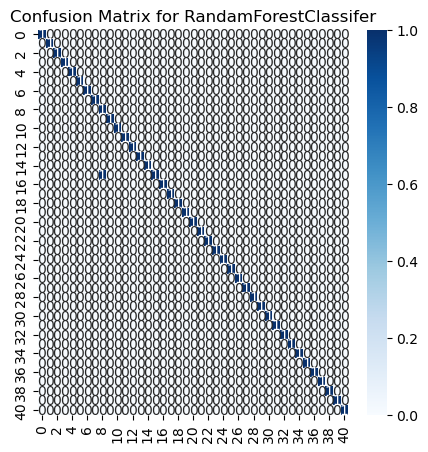

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(m, annot=True, cmap='Blues')
plt.title("Confusion Matrix for RandamForestClassifer")